In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
import re
import string
from nltk.stem import PorterStemmer, SnowballStemmer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from nltk.corpus import inaugural
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
#https://www.kaggle.com/samdeeplearning/deepnlp#Sheet_1.csv
#https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34
#http://www.alfredo.motta.name/cross-validation-done-wrong/
#https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation
#https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

In [6]:
df2 = pd.read_csv("Sheet_2.csv", encoding="latin-1")

In [7]:
STOPWORDS = set(stopwords.words('english'))

In [8]:
def clean_sentence(value):
    char_list = ["\r", "\x8a", "\x97¢", "\x97", "\x8f", "_"]
    value = value.lower()
    value = re.sub(r"(\s\S*@\S*\.\S*)", " ", value)
    value = re.sub(r"(\s\S*\.com\S*)", " ", value)
    for i in char_list:
        value = value.replace(i, " ")
    value = re.sub(r"\W", " ", value)
    value = re.sub(r"[0-9]", " ", value)
    return value

In [9]:
df2["resume_text"] = df2.resume_text.apply(clean_sentence).values

In [10]:
lem = WordNetLemmatizer()

In [11]:
def get_words(value, stop_words=STOPWORDS):
    tokens = word_tokenize(value)
    words = [lem.lemmatize(w) for w in tokens if w not in STOPWORDS]
    return " ".join(words)

In [16]:
df2["words"] = df2.resume_text.apply(get_words)

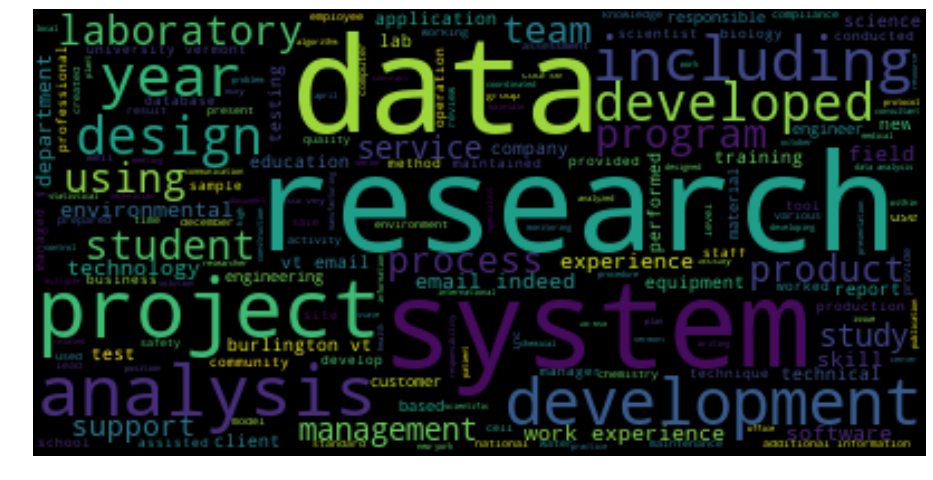

In [17]:
wordcloud = WordCloud(max_font_size=60).generate(" ".join(df2["words"].values))
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
tfidfconverter = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.8, stop_words=stopwords.words('english'))  
x = tfidfconverter.fit_transform(df2["words"])
x = x.toarray()  

In [19]:
labelencoder = LabelEncoder()

In [20]:
y = df2["class"].values
y = labelencoder.fit_transform(y)
labelencoder.inverse_transform([0, 1])

array(['flagged', 'not_flagged'], dtype=object)

In [21]:
mnb = MultinomialNB()

In [23]:
cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()

0.7299450549450549

In [25]:
y_pred = cross_val_predict(mnb, x, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[ 0, 33],
       [ 1, 91]])

In [26]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      0.99      0.84        92

   micro avg       0.73      0.73      0.73       125
   macro avg       0.37      0.49      0.42       125
weighted avg       0.54      0.73      0.62       125



In [27]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=2, gamma='auto')

In [28]:
cross_val_score(SVM, x, y, scoring='accuracy', cv=10).mean()# accuracy

0.7858058608058609

In [29]:
y_pred = cross_val_predict(SVM, x, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[ 8, 25],
       [ 2, 90]])

In [30]:
SVM = svm.SVC(C=1.0, kernel='precomputed', degree=2, gamma='auto')

In [31]:
gram = np.dot(x, x.T)

In [32]:
cross_val_score(SVM, gram, y, scoring='accuracy', cv=10).mean()# accuracy

0.7858058608058609

In [33]:
y_pred = cross_val_predict(SVM, gram, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[ 8, 25],
       [ 2, 90]])

In [34]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

In [35]:
sklearn_pca = PCA(n_components=4)
x_pca = sklearn_pca.fit_transform(X_std)

In [36]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=2)

In [37]:
cross_val_score(SVM, x_pca, y, scoring='accuracy', cv=10).mean()# accuracy

0.8197802197802198

In [38]:
y_pred = cross_val_predict(SVM, x_pca, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[16, 17],
       [ 6, 86]])

In [39]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.48      0.58        33
           1       0.83      0.93      0.88        92

   micro avg       0.82      0.82      0.82       125
   macro avg       0.78      0.71      0.73       125
weighted avg       0.81      0.82      0.80       125

